In [1]:
import warnings
from math import factorial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_theme()

# Likelihoods

The **binomial probability ($\theta$)** of observe $k$ number of successes in $n$ studies is:

$$ \theta = Pr(k;n,p) = \frac { n! } { k!(n - k)! } p^k(1 - p)^{ n - k } $$

where $p$ is the probability of success, $k$ is the observed number of successes, and $n$ is the number of trials.

E.g., What is the binomial probability of obse4rving 8 heads out of 10 fair coin flips, when $p = 0.5$?

$$ Pr(8; 10, 0.5) = \frac { 10! } { 8!(10 - 8)! } \times 0.5^8 \times (1 - 0.5)^{ (10 - 8)} $$

In [2]:
factorial(10) / (factorial(8) * factorial(10 - 8)) * 0.5**8 * (1 - 0.5)**(10 - 8)

0.0439453125

In [3]:
st.binom.pmf(k=8, n=10, p=0.5)

0.04394531249999997

Since $p$ can be any value between $0$ and $1$, we can plot all values in what is known as the likelihood function, so we can see the maximum more easily.

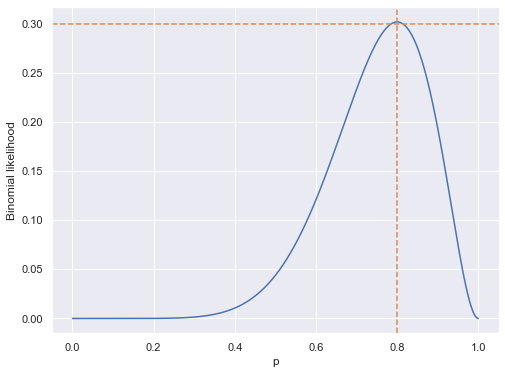

In [4]:
probs = np.arange(0, 1.001, 0.001)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, st.binom.pmf(k=8, n=10, p=probs))
ax.axvline(0.8, color="C1", linestyle="--")
ax.axhline(0.3, color="C1", linestyle="--")
ax.set_xlabel("p")
ax.set_ylabel("Binomial likelihood");

Since $p = 0.8$ gives the maximum likihood, it is called the **maximum likelihood estimator**.

If $k = 0$ (e.g., 0 heads out of 10 flips):

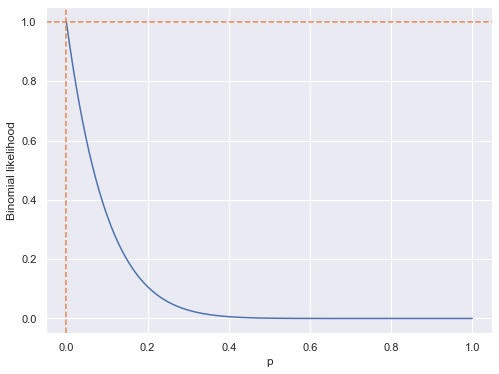

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, st.binom.pmf(k=0, n=10, p=probs))
ax.axvline(0.0, color="C1", linestyle="--")
ax.axhline(1.0, color="C1", linestyle="--")
ax.set_xlabel("p")
ax.set_ylabel("Binomial likelihood");

Here, a person got 8 heads out of 10 flip, and another 4 heads out of 10 flip. We can visualize both and their joint likelihood:

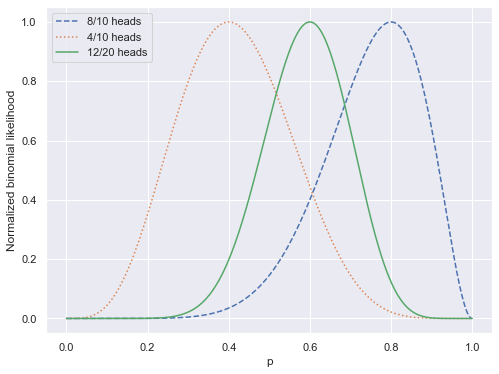

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, st.binom.pmf(k=8, n=10, p=probs) / st.binom.pmf(k=8, n=10, p=probs).max(), label="8/10 heads", linestyle="--")
ax.plot(probs, st.binom.pmf(k=4, n=10, p=probs) / st.binom.pmf(k=4, n=10, p=probs).max(), label="4/10 heads", linestyle="dotted")
ax.plot(probs, st.binom.pmf(k=12, n=20, p=probs) / st.binom.pmf(k=12, n=20, p=probs).max(), label="12/20 heads")
ax.set_xlabel("p")
ax.legend()
ax.set_ylabel("Normalized binomial likelihood");

Here's 5 heads out of 10 flips, 50 heads out of 100 flips, and 500 heads out of 1000 flips:

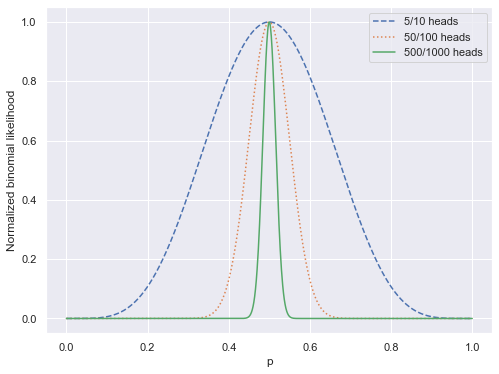

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, st.binom.pmf(k=5, n=10, p=probs) / st.binom.pmf(k=5, n=10, p=probs).max(), label="5/10 heads", linestyle="--")
ax.plot(probs, st.binom.pmf(k=50, n=100, p=probs) / st.binom.pmf(k=50, n=100, p=probs).max(), label="50/100 heads", linestyle="dotted")
ax.plot(probs, st.binom.pmf(k=500, n=1000, p=probs) / st.binom.pmf(k=500, n=1000, p=probs).max(), label="500/1000 heads")
ax.set_xlabel("p")
ax.legend()
ax.set_ylabel("Normalized binomial likelihood");

**Q1:** Let’s assume you expect this is a fair coin. What is the binomial probability of observing 8 heads out of 10 coin flips, when p = 0.5? (You can use the functions in the chapter, or compute it by hand).

1. **0.044**
2. 0.05
3. 0.5
4. 0.8


In [8]:
st.binom.pmf(k=8, n=10, p=0.5)

0.04394531249999997

**Q2:** The likelihood curve rises up and falls down, except at the extremes, when 0 heads or only heads are observed. Copy the code below, and plot the likelihood curves for 0 heads (x <- 0) out of 10 flips (n <- 10) by running the script. What does the likelihood curve look like?

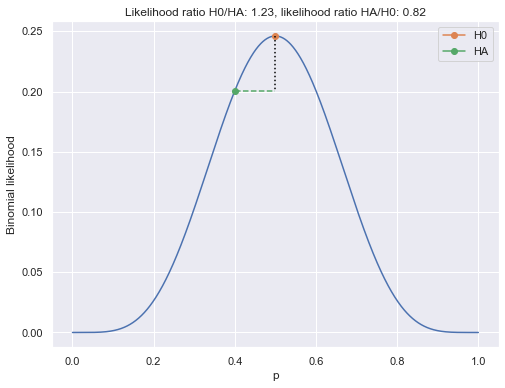

In [28]:
n_trials = 10
success = 5
h_null = 0.5
h_alt = 0.4

likelihood_null_alt = st.binom.pmf(k=success, n=n_trials, p=h_null) / st.binom.pmf(k=success, n=n_trials, p=h_alt) 
likelihood_alt_null = st.binom.pmf(k=success, n=n_trials, p=h_alt) / st.binom.pmf(k=success, n=n_trials, p=h_null) 

likelihoods = st.binom.pmf(k=success, n=n_trials, p=probs)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, likelihoods)
ax.plot(h_null, st.binom.pmf(k=success, n=n_trials, p=h_null), marker="o", label="H0") 
ax.plot(h_alt, st.binom.pmf(k=success, n=n_trials, p=h_alt), marker="o", label="HA")
ax.plot((h_null, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_null)), linestyle="--", color="C1")
ax.plot((h_alt, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_alt), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="--", color="C2")
ax.plot((success / n_trials, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="dotted", color="black")
ax.set_xlabel("p")
ax.legend()
ax.set_title(f"Likelihood ratio H0/HA: {round(likelihood_null_alt, 2)}, likelihood ratio HA/H0: {round(likelihood_alt_null, 2)}")
ax.set_ylabel("Binomial likelihood");

1. The likelihood curve is a horizontal line.
2. The script returns and error message: it is not possible to plot the likelihood curve for 0 heads.
3. The curve starts at its highest point at p = 0, and then the likelihood decreases as p increases.
4. **The curve starts at its lowest point at p = 0, and then the likelihood increases as p increases.**


**Q3:** Get a coin out of your wallet. Flip it 13 times, and count the number of heads. Using the code above, calculate the likelihood of your observed results under the hypothesis that your coin is fair, compared to the hypothesis that the coin is not fair. Set the number of successes (x) to the number of heads you observed. Change H1 to the number of heads you have observed (or leave it to 0 if you didn’t observe any heads at all!). You can just use 4/13, or enter 0.3038. Leave H0 at 0.5. Run the script to calculate the likelihood ratio. What is the likelihood ratio of a fair compared to a non-fair coin (or H0/H1) that flips heads as often as you have observed, based on the observed data? Round your answer to 2 digits after the decimal.

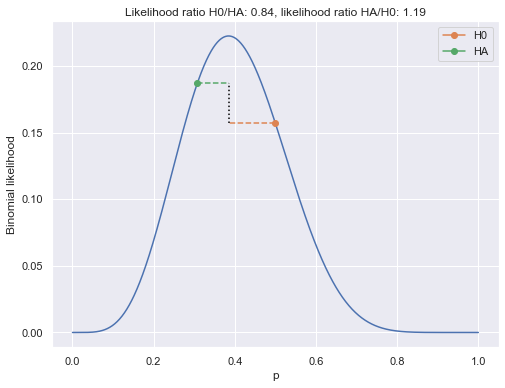

In [29]:
n_trials = 13
success = 5
h_null = 0.5
h_alt = 4/13

likelihood_null_alt = st.binom.pmf(k=success, n=n_trials, p=h_null) / st.binom.pmf(k=success, n=n_trials, p=h_alt) 
likelihood_alt_null = st.binom.pmf(k=success, n=n_trials, p=h_alt) / st.binom.pmf(k=success, n=n_trials, p=h_null) 

likelihoods = st.binom.pmf(k=success, n=n_trials, p=probs)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, likelihoods)
ax.plot(h_null, st.binom.pmf(k=success, n=n_trials, p=h_null), marker="o", label="H0") 
ax.plot(h_alt, st.binom.pmf(k=success, n=n_trials, p=h_alt), marker="o", label="HA")
ax.plot((h_null, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_null)), linestyle="--", color="C1")
ax.plot((h_alt, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_alt), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="--", color="C2")
ax.plot((success / n_trials, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="dotted", color="black")
ax.set_xlabel("p")
ax.legend()
ax.set_title(f"Likelihood ratio H0/HA: {round(likelihood_null_alt, 2)}, likelihood ratio HA/H0: {round(likelihood_alt_null, 2)}")
ax.set_ylabel("Binomial likelihood");

Earlier we mentioned that with increasing sample sizes, we had collected stronger relative evidence. Let’s say we would want to compare L(p = 0.4) with L(p = 0.5).

**Q4:** What is the likelihood ratio if H1 is 0.4, H0 is 0.5, and you flip 5 heads in 10 trials? From the two possible ways to calculate the likelihood ratio (H1/H0 and H0/H1), report the likelihood that is ≥ 1, and round to 2 digits after the decimal point.

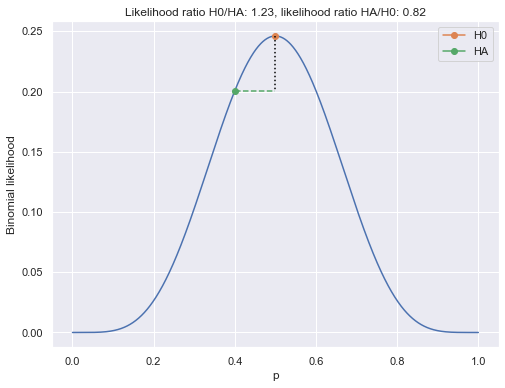

In [30]:
n_trials = 10
success = 5
h_null = 0.5
h_alt = 0.4

likelihood_null_alt = st.binom.pmf(k=success, n=n_trials, p=h_null) / st.binom.pmf(k=success, n=n_trials, p=h_alt) 
likelihood_alt_null = st.binom.pmf(k=success, n=n_trials, p=h_alt) / st.binom.pmf(k=success, n=n_trials, p=h_null) 

likelihoods = st.binom.pmf(k=success, n=n_trials, p=probs)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, likelihoods)
ax.plot(h_null, st.binom.pmf(k=success, n=n_trials, p=h_null), marker="o", label="H0") 
ax.plot(h_alt, st.binom.pmf(k=success, n=n_trials, p=h_alt), marker="o", label="HA")
ax.plot((h_null, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_null)), linestyle="--", color="C1")
ax.plot((h_alt, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_alt), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="--", color="C2")
ax.plot((success / n_trials, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="dotted", color="black")
ax.set_xlabel("p")
ax.legend()
ax.set_title(f"Likelihood ratio H0/HA: {round(likelihood_null_alt, 2)}, likelihood ratio HA/H0: {round(likelihood_alt_null, 2)}")
ax.set_ylabel("Binomial likelihood");

**Q5:** What is the likelihood ratio if H1 is 0.4, H0 is 0.5, and you flip 50 heads in 100 trials? From the two possible ways to calculate the likelihood ratio (H1/H0 and H0/H1), report the likelihood that is ≥ 1, and round to 2 digits after the decimal point.

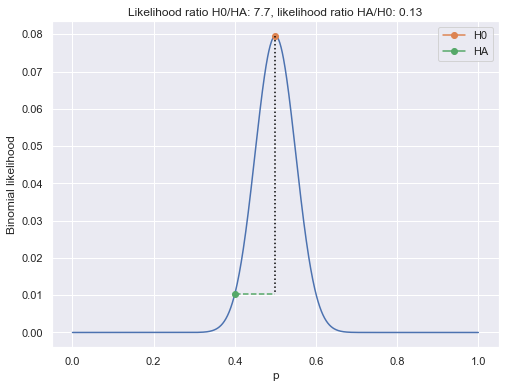

In [31]:
n_trials = 100
success = 50
h_null = 0.5
h_alt = 0.4

likelihood_null_alt = st.binom.pmf(k=success, n=n_trials, p=h_null) / st.binom.pmf(k=success, n=n_trials, p=h_alt) 
likelihood_alt_null = st.binom.pmf(k=success, n=n_trials, p=h_alt) / st.binom.pmf(k=success, n=n_trials, p=h_null) 

likelihoods = st.binom.pmf(k=success, n=n_trials, p=probs)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, likelihoods)
ax.plot(h_null, st.binom.pmf(k=success, n=n_trials, p=h_null), marker="o", label="H0") 
ax.plot(h_alt, st.binom.pmf(k=success, n=n_trials, p=h_alt), marker="o", label="HA")
ax.plot((h_null, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_null)), linestyle="--", color="C1")
ax.plot((h_alt, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_alt), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="--", color="C2")
ax.plot((success / n_trials, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="dotted", color="black")
ax.set_xlabel("p")
ax.legend()
ax.set_title(f"Likelihood ratio H0/HA: {round(likelihood_null_alt, 2)}, likelihood ratio HA/H0: {round(likelihood_alt_null, 2)}")
ax.set_ylabel("Binomial likelihood");

**Q6:** What is the likelihood ratio if H1 is 0.4, H0 is 0.5, and you flip 500 heads in 1000 trials? From the two possible ways to calculate the likelihood ratio (H1/H0 and H0/H1), report the likelihood that is ≥ 1, and round to 2 digits after the decimal point.

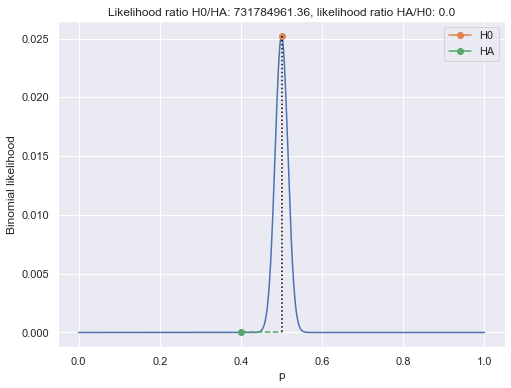

In [32]:
n_trials = 1000
success = 500
h_null = 0.5
h_alt = 0.4

likelihood_null_alt = st.binom.pmf(k=success, n=n_trials, p=h_null) / st.binom.pmf(k=success, n=n_trials, p=h_alt) 
likelihood_alt_null = st.binom.pmf(k=success, n=n_trials, p=h_alt) / st.binom.pmf(k=success, n=n_trials, p=h_null) 

likelihoods = st.binom.pmf(k=success, n=n_trials, p=probs)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(probs, likelihoods)
ax.plot(h_null, st.binom.pmf(k=success, n=n_trials, p=h_null), marker="o", label="H0") 
ax.plot(h_alt, st.binom.pmf(k=success, n=n_trials, p=h_alt), marker="o", label="HA")
ax.plot((h_null, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_null)), linestyle="--", color="C1")
ax.plot((h_alt, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_alt), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="--", color="C2")
ax.plot((success / n_trials, success / n_trials), (st.binom.pmf(k=success, n=n_trials, p=h_null), st.binom.pmf(k=success, n=n_trials, p=h_alt)), linestyle="dotted", color="black")
ax.set_xlabel("p")
ax.legend()
ax.set_title(f"Likelihood ratio H0/HA: {round(likelihood_null_alt, 2)}, likelihood ratio HA/H0: {round(likelihood_alt_null, 2)}")
ax.set_ylabel("Binomial likelihood");

**Q7:** When comparing two hypotheses (p = X vs p = Y), a likelihood ratio of:

1. 0.02 means that there is not enough evidence in the data for either of the two hypotheses.
2. 5493 means that hypothesis p = X is most supported by the data.
3. **5493 means that hypothesis p = X is much more supported by the data than p = Y.**
4. 0.02 means that the hypothesis that the data are 2% more likely under the hypothesis that p = X than under the hypothesis that p = Y.


**Q8:** Which statement is correct when you perform 3 studies?

1. When H1 is true, alpha = 0.05, and power = 0.80, it is almost as likely to observe one or more non-significant results (48.8%) as it is to observe only significant results (51.2%).
2. When alpha = 0.05 and power = 0.80, it is extremely rare that you will find 3 significant results (0.0125%), regardless of whether H0
is true or H1 is true.
3. **When alpha = 0.05 and power = 0.80, 2 out of 3 statistically significant results is the most likely outcome of all possible outcomes (0 out of 3, 1 out of 3, 2 out of 3, or 3 out of 3), and occurs 38.4% of the time when H1 is true.**
4. When alpha = 0.05 and power = 0.80, the probability of finding at least one false positive (a significant result when H0
is true) in three studies is 5%.

In [33]:
st.binom.pmf(k=2, n=3, p=0.8)

0.384

**Q9:** Sometimes in lines of three studies, you’ll find a significant effect in one study, but there is no effect in the other two related studies. Assume the two related studies were not exactly the same in every way (e.g., you have changed the manipulation, or the procedure, or some of the questions). It could be that the two other studies did not work because of minor differences that had some effect you do not fully understand yet. Or it could be that the single significant result was a Type 1 error, and H0 was true in all three studies. Which statement below is correct, assuming a 5% Type 1 error rate and 80% power?

1. All else being equal, the probability of a Type 1 error in one of three studies is 5% when there is no true effect in all three studies, and the probability of finding exactly 1 in three significant effects, assuming 80% power in all three studies, is 80%, which is substantially more likely.
2. **All else being equal, the probability of a Type 1 error in one of three studies is 13.5% when there is no true effect in all three studies, and the probability of finding exactly 1 in three significant effects, assuming 80% power in all three studies (and thus a true effect), is 9.6%, which is slightly, but not substantially less likely.**
3. All else being equal, the probability of a Type 1 error in one of three studies is 85.7% when there is no true effect in all three studies, and the probability of finding exactly 1 in three significant effects, assuming 80% power in all three studies (and thus a true effect) (and thus a true effect), is 0.8%, which is substantially less likely.
4. It is not possible to know the probability you will observe a Type 1 error if you perform 3 studies.


In [35]:
st.binom.pmf(k=1, n=3, p=0.05)  # H0 is true; any significant effect is a type 1 error, 5% chance of occurring

0.135375

In [36]:
st.binom.pmf(k=1, n=3, p=0.80) # H1 is true, any significant effect is a true positive, 80% chance of occurring

0.09600000000000006

In [37]:
st.binom.pmf(k=1, n=3, p=0.50) # Same as above but power only at 50%

0.3750000000000001

In [38]:
st.binom.pmf(k=1, n=3, p=0.30) # Same as above but power only at 30%

0.4409999999999998

Imagine you perform 4 studies, and 3 show a significant result. Change these numbers in the online app. Leave the power at 50%. The output in the text tells you:

When the observed results are equally likely under H0 and H1, the likelihood ratio is 1. Benchmarks to interpret Likelihood Ratios suggest that when 1<LR<8 there is weak evidence, when 8<LR<32 there is moderate evidence, and when LR>32, there is strong evidence.

The data are more likely under the alternative hypothesis than the null hypothesis with a likelihood ratio of 526.32.

These calculations show that, assuming you have observed three significant results out of four studies, and assuming each study had 50% power, it is 526 times more likely to have observed these data when the alternative hypothesis is true, than when the null hypothesis is true. In other words, it is 526 times more likely to find a significant effect in three studies when you have 50% power, than to find three Type 1 errors in a set of four studies.

In [39]:
st.binom.pmf(k=3, n=4, p=0.50)  # When HA is true

0.25000000000000006

In [40]:
st.binom.pmf(k=3, n=4, p=0.05) # When H0 is true

0.00047500000000000005

In [41]:
st.binom.pmf(k=3, n=4, p=0.50) / st.binom.pmf(k=3, n=4, p=0.05)  # Likelihood ratio

526.3157894736843

**Q11:** Maybe you don’t think 50% power is a reasonable assumption. How low can the power be (rounded to 2 digits), for the likelihood to remain higher than 32 in favor of H1 when observing 3 out of 4 significant results?


1. 5% power
2. **17% power**
3. 34% power
4. 44% power


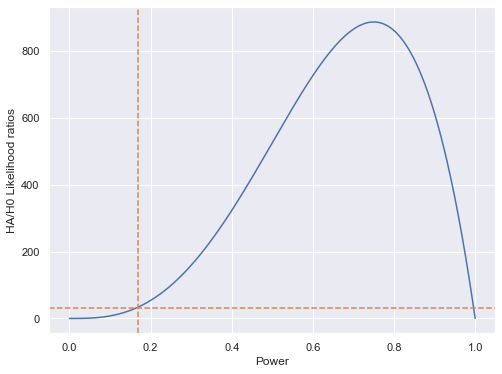

In [45]:
powers = np.arange(0, 1.001, 0.001)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(powers, st.binom.pmf(k=3, n=4, p=powers) / st.binom.pmf(k=3, n=4, p=0.05))
ax.axhline(32, color="C1", linestyle="--")
ax.axvline(0.17, color="C1", linestyle="--")
ax.set_xlabel("Power")
ax.set_ylabel("HA/H0 Likelihood ratios");

**Q12:** Go back to the default settings of 2 out of 3 significant results, but now set the Type 1 error rate to 20%, to reflect a modest amount of p-hacking. Under these circumstances, what is the highest likelihood in favor of H1 you can get if you explore all possible values for the true power?

1. Approximately 1
2. **Approximately 4.63**
3. Approximately 6.70
4. Approximately 62.37


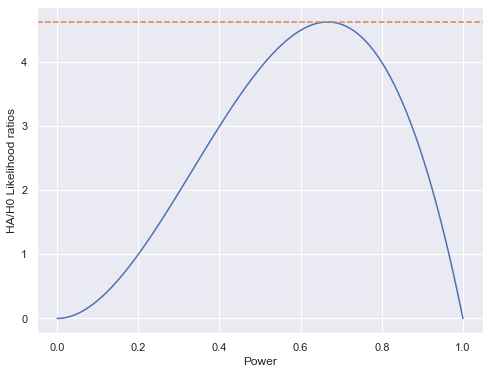

In [48]:
powers = np.arange(0, 1.001, 0.001)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(powers, st.binom.pmf(k=2, n=3, p=powers) / st.binom.pmf(k=2, n=3, p=0.20))
ax.axhline(4.63, color="C1", linestyle="--")
ax.set_xlabel("Power")
ax.set_ylabel("HA/H0 Likelihood ratios");

**Q13:** Some ‘prestigious’ journals (which, when examined in terms of scientific quality such as reproducibility, reporting standards, and policies concerning data and material sharing, are quite low quality despite their prestige) only publish manuscripts with a large number of studies, which should all be statistically significant. If we assume an average power in psychology of 50%, only 3.125% of 5 study articles should contain exclusively significant results. If you pick up a random issue from such a prestigious journal, and see 10 articles, each reporting 5 studies, and all manuscripts have exclusively significant results, would you trust the reported findings more, or less, than when all these articles had reported mixed results? Why?

**Q14:** Unless you will power all your studies at 99.99% for the rest of your career (which would be slightly inefficient, but great if you don’t like insecurity), you will observe mixed results in lines of research. How do you plan to deal with mixed results in lines of research?



1. What is the difference between a probability and a likelihood?
2. Why is it important to remember that a likelihood ratio is relative evidence?
3. If we compare 2 hypotheses, H0 and H1, and the likelihood ratio of H1 compared to H0 is 77, what does this mean?
4. What are benchmarks for medium and strong evidence according to Royall?
5. How can it be that a likelihood ratio is 200, but both hypotheses are incorrect?
6. If we perform multiple studies and find 2 out of 3 studies show a significant results, how can this actually be strong evidence for H1?
